In [10]:
# data visualization and utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import graphviz
%matplotlib inline

In [11]:
# classifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN

# evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV

# data preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
loan = pd.read_csv('kiva_loans.csv')

In [7]:
loan.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [8]:
min(loan['funded_amount'])

0.0

In [9]:
max(loan['funded_amount'])

100000.0

In [11]:
len(loan)

671205

In [84]:
count = np.zeros(10001)
for i in range(len(loan)):    
    count[int(loan.at[i,'funded_amount'] / 10)] += 1

In [85]:
effective_count = count[0:100]

In [86]:
x = range(0,10000, 100)

In [87]:
len(x)

100

In [88]:
len(effective_count)

100

In [89]:
for i in range(10):
    print(effective_count[i], x[i])

3391.0 0
14.0 100
1108.0 200
14.0 300
8.0 400
4647.0 500
4.0 600
6779.0 700
4.0 800
6.0 900


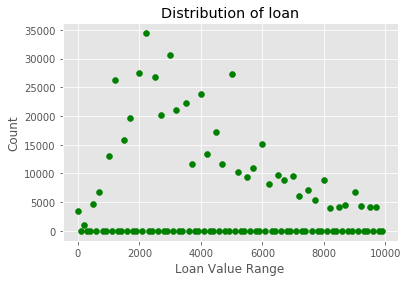

In [90]:
plt.style.use('ggplot')
plt.scatter(x, effective_count, color='green')
plt.xlabel("Loan Value Range")
plt.ylabel("Count")
plt.title("Distribution of loan")
plt.show()

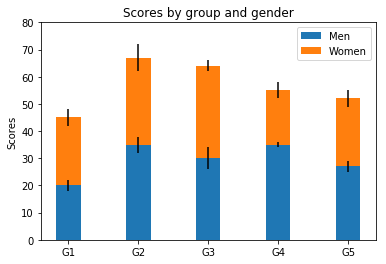

In [4]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [92]:
min(loan['lender_count'])

0

In [93]:
max(loan['lender_count'])

2986

In [94]:
count = np.zeros(101)
for i in range(len(loan)):    
    count[int(loan.at[i,'lender_count'] / 30)] += 1

In [100]:
x = range(0,3030, 30)

In [101]:
len(count)

101

In [102]:
len(x)

101

In [105]:
for i in range(10):
    print(effective_count[i], x[i])

3391.0 0
14.0 30
1108.0 60
14.0 90
8.0 120
4647.0 150
4.0 180
6779.0 210
4.0 240
6.0 270


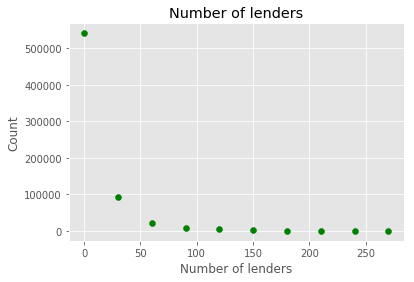

In [112]:
plt.style.use('ggplot')
plt.scatter(x[0:10], count[0:10], color='green')
plt.xlabel("Number of lenders")
plt.ylabel("Count")
plt.title("Number of lenders")
plt.show()

In [4]:
loan_std = pd.read_csv('kiva_loans_standardized.csv')

In [5]:
selected_features = list(loan_std.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_bullet')

In [6]:
X = loan_std[selected_features]
y = loan['repayment_interval']

In [14]:
dtree = DTC()

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0

for train_index, test_index in kf.split(X):

    
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lda = LDA()
    
    X_train_lda = lda.fit_transform(X.iloc[train_index], y_train)
    X_test_lda = lda.transform(X.iloc[test_index])

    dtree.fit(X_train_lda,y_train)
    ALL_PRED_LABEL.extend(dtree.predict(X_test_lda))
    ALL_TRUE_LABEL.extend(y_test)

    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1    

print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Finish Test Iteration  0


c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Finish Test Iteration  1


c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Finish Test Iteration  2


c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Finish Test Iteration  3


c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Finish Test Iteration  4


c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Finish Test Iteration  5


c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Finish Test Iteration  6


c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Finish Test Iteration  7


c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Finish Test Iteration  8


c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.78      0.79      0.79     70728
   irregular       0.84      0.85      0.84    257158
     monthly       0.86      0.85      0.86    342717
      weekly       0.58      0.51      0.54       602

   micro avg       0.84      0.84      0.84    671205
   macro avg       0.77      0.75      0.76    671205
weighted avg       0.84      0.84      0.84    671205

[[ 56009   3326  11368     25]
 [  3484 219483  34032    159]
 [ 12194  39407 291081     35]
 [    18    223     55    306]]


In [15]:
from sklearn.metrics import precision_score

In [16]:
score = []
impurity = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 0]
j = 1
for j in range(len(impurity)):
            
    dtree = DTC(max_depth = 46000, min_impurity_decrease = impurity[j])

    ALL_TRUE_LABEL = []
    ALL_PRED_LABEL = []
    kf = KFold(n_splits=10)
    i = 0

    for train_index, test_index in kf.split(X):    

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtree.fit(X_train,y_train)
        ALL_PRED_LABEL.extend(dtree.predict(X_test))
        ALL_TRUE_LABEL.extend(y_test)

        # Screen Output for tracking the progress, sometimes I wait too long......
        print('Finish Test Iteration ',i)
        i += 1
    score.append(precision_score(ALL_TRUE_LABEL, ALL_PRED_LABEL, average = 'macro'))
    print('Finish Depth Iteration ',j)
#     print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
#     print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Finish Depth Iteration  0
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Finish Depth Iteration  1
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Finish Depth Iteration  2
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  3
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  4
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  5
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration

In [17]:
min_split = ['1e-1', '1e-2', '1e-3', '1e-4', '1e-5', '1e-6', '1e-7', '1e-8', '1e-9', '0']

In [18]:
score

[0.3868905835746212,
 0.5568632292866612,
 0.6233245854038527,
 0.8227441602486596,
 0.8595936993344464,
 0.8576121082979152,
 0.8476843894712094,
 0.8494843970810682,
 0.8474184802326783,
 0.8484513017711873]

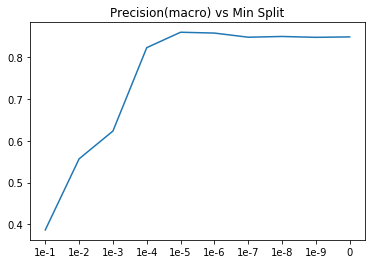

In [19]:
plt.plot(min_split, score)
# plt.xlabel('Precision(macro)')
# plt.ylabel('Maximum Depth')
plt.title('Precision(macro) vs Min Split')
plt.show()